# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

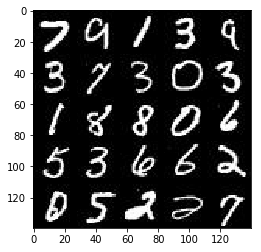

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

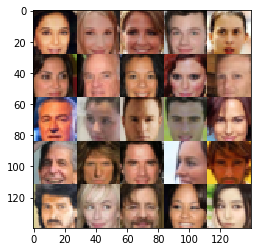

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None,image_width, image_height, image_channels), name="input_real")
    input_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    lr = tf.placeholder(tf.float32, name="learning_rate")

    return input_real, input_z, lr



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):       
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())        
        #x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        
        # flatten into 1
        flatten = tf.reshape(x3, (-1, 2*2*256))
        logits = tf.layers.dense(flatten, 1)
        out = tf.sigmoid(logits)
    
    return (out, logits)
        
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2    
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 2*2*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 2, 2, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)        
        x1 = tf.maximum(alpha * x1, x1)
        # 4x4x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, filters=256, kernel_size=5, strides=2, padding='valid', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # 16x16x256 now
        
        x3 = tf.layers.conv2d_transpose(x2, filters=128, kernel_size=5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, filters=out_channel_dim, kernel_size=5, strides=2, padding='same', kernel_initializer=tf.contrib.layers.xavier_initializer())
        out = tf.tanh(logits)        
        return out
    
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    gen_model = generator(input_z, out_channel_dim)
    disc_model_real, disc_logits_real = discriminator(input_real)
    disc_model_fake, disc_logits_fake = discriminator(gen_model, reuse=True)
    
    disc_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=disc_logits_real,
                                                                           labels=tf.ones_like(disc_model_real)*(1 - 0.1)))
    disc_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=disc_logits_fake,
                                                                           labels=tf.zeros_like(disc_model_fake)))
    gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=disc_logits_fake,
                                                                     labels=tf.ones_like(disc_model_fake)))
    
    disc_loss = disc_loss_real + disc_loss_fake
    
    return disc_loss, gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    train_vars = tf.trainable_variables()
    gen_vars = [x for x in train_vars if x.name.startswith('generator')]
    disc_vars = [x for x in train_vars if x.name.startswith('discriminator')]
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        disc_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=disc_vars)
        gen_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=gen_vars)
    
    return disc_train_opt, gen_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    print_every = 10
    show_every = 100
    step = 0
    
    samples, width, height, channels = data_shape
    
    input_real, input_z, lr = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    saver = tf.train.Saver()

    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                 # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_images = batch_images * 2.0

                # Run optimizers
                sess.run(d_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                sess.run(g_train_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                
                steps += 1
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_real: batch_images, input_z: batch_z})
                    train_loss_g = g_loss.eval({input_real: batch_images, input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 16, input_z, channels, data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.9071... Generator Loss: 1.1155
Epoch 1/2... Discriminator Loss: 0.7906... Generator Loss: 1.3973
Epoch 1/2... Discriminator Loss: 0.9767... Generator Loss: 1.2272
Epoch 1/2... Discriminator Loss: 1.4398... Generator Loss: 0.7408
Epoch 1/2... Discriminator Loss: 1.5359... Generator Loss: 0.6172
Epoch 1/2... Discriminator Loss: 0.9618... Generator Loss: 1.3560
Epoch 1/2... Discriminator Loss: 0.8339... Generator Loss: 1.5616
Epoch 1/2... Discriminator Loss: 0.7674... Generator Loss: 1.4089
Epoch 1/2... Discriminator Loss: 0.8061... Generator Loss: 1.6997
Epoch 1/2... Discriminator Loss: 1.1260... Generator Loss: 0.6554


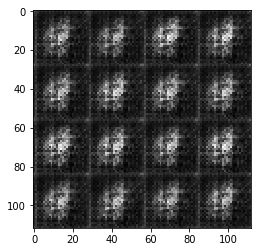

Epoch 1/2... Discriminator Loss: 0.6980... Generator Loss: 1.7208
Epoch 1/2... Discriminator Loss: 1.0179... Generator Loss: 2.1211
Epoch 1/2... Discriminator Loss: 1.0451... Generator Loss: 0.9073
Epoch 1/2... Discriminator Loss: 0.5988... Generator Loss: 2.0479
Epoch 1/2... Discriminator Loss: 0.6935... Generator Loss: 1.9264
Epoch 1/2... Discriminator Loss: 1.1000... Generator Loss: 1.5009
Epoch 1/2... Discriminator Loss: 0.8247... Generator Loss: 1.4349
Epoch 1/2... Discriminator Loss: 0.7239... Generator Loss: 1.5302
Epoch 1/2... Discriminator Loss: 0.8269... Generator Loss: 1.5947
Epoch 1/2... Discriminator Loss: 0.7937... Generator Loss: 2.7976


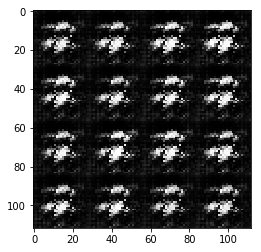

Epoch 1/2... Discriminator Loss: 0.6384... Generator Loss: 2.0320
Epoch 1/2... Discriminator Loss: 1.2793... Generator Loss: 0.6316
Epoch 1/2... Discriminator Loss: 1.0716... Generator Loss: 0.7898
Epoch 1/2... Discriminator Loss: 0.8138... Generator Loss: 2.5600
Epoch 1/2... Discriminator Loss: 0.7175... Generator Loss: 1.4191
Epoch 1/2... Discriminator Loss: 0.9207... Generator Loss: 1.0719
Epoch 1/2... Discriminator Loss: 0.9951... Generator Loss: 2.4034
Epoch 1/2... Discriminator Loss: 0.6091... Generator Loss: 2.0188
Epoch 1/2... Discriminator Loss: 1.0012... Generator Loss: 1.2293
Epoch 1/2... Discriminator Loss: 0.8714... Generator Loss: 1.3721


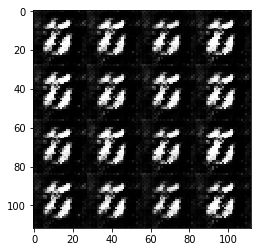

Epoch 1/2... Discriminator Loss: 1.0424... Generator Loss: 2.8091
Epoch 1/2... Discriminator Loss: 1.1721... Generator Loss: 3.4477
Epoch 1/2... Discriminator Loss: 1.0461... Generator Loss: 1.4522
Epoch 1/2... Discriminator Loss: 0.8168... Generator Loss: 1.5211
Epoch 1/2... Discriminator Loss: 0.7502... Generator Loss: 2.2974
Epoch 1/2... Discriminator Loss: 0.7961... Generator Loss: 1.3863
Epoch 1/2... Discriminator Loss: 0.6795... Generator Loss: 2.1233
Epoch 1/2... Discriminator Loss: 0.7132... Generator Loss: 2.5077
Epoch 1/2... Discriminator Loss: 0.9582... Generator Loss: 1.0000
Epoch 1/2... Discriminator Loss: 0.7404... Generator Loss: 1.8073


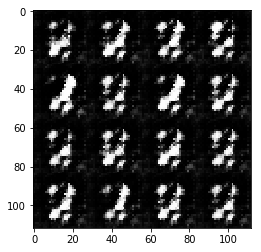

Epoch 1/2... Discriminator Loss: 0.9164... Generator Loss: 1.1604
Epoch 1/2... Discriminator Loss: 0.6681... Generator Loss: 1.7996
Epoch 1/2... Discriminator Loss: 0.6597... Generator Loss: 2.2575
Epoch 1/2... Discriminator Loss: 0.6107... Generator Loss: 2.4705
Epoch 1/2... Discriminator Loss: 0.6523... Generator Loss: 2.0849
Epoch 1/2... Discriminator Loss: 0.7048... Generator Loss: 1.8000
Epoch 1/2... Discriminator Loss: 0.6924... Generator Loss: 1.6712
Epoch 1/2... Discriminator Loss: 0.8456... Generator Loss: 1.1377
Epoch 1/2... Discriminator Loss: 0.7078... Generator Loss: 3.2228
Epoch 1/2... Discriminator Loss: 0.6837... Generator Loss: 1.6607


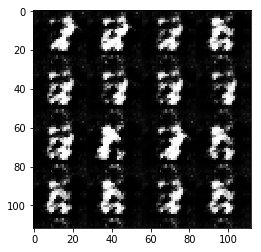

Epoch 1/2... Discriminator Loss: 0.5953... Generator Loss: 2.0572
Epoch 1/2... Discriminator Loss: 0.7899... Generator Loss: 1.3696
Epoch 1/2... Discriminator Loss: 0.6965... Generator Loss: 1.7732
Epoch 1/2... Discriminator Loss: 0.7135... Generator Loss: 2.1181
Epoch 1/2... Discriminator Loss: 0.7339... Generator Loss: 2.3017
Epoch 1/2... Discriminator Loss: 0.8021... Generator Loss: 1.9471
Epoch 1/2... Discriminator Loss: 0.6907... Generator Loss: 1.5734
Epoch 1/2... Discriminator Loss: 0.5932... Generator Loss: 2.3673
Epoch 1/2... Discriminator Loss: 0.7159... Generator Loss: 1.5563
Epoch 1/2... Discriminator Loss: 1.0038... Generator Loss: 3.1905


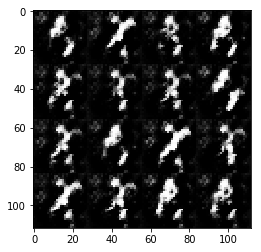

Epoch 1/2... Discriminator Loss: 1.1440... Generator Loss: 3.6560
Epoch 1/2... Discriminator Loss: 0.6922... Generator Loss: 1.5420
Epoch 1/2... Discriminator Loss: 0.5913... Generator Loss: 2.0659
Epoch 1/2... Discriminator Loss: 0.9529... Generator Loss: 1.0855
Epoch 1/2... Discriminator Loss: 0.9002... Generator Loss: 1.0714
Epoch 1/2... Discriminator Loss: 0.9602... Generator Loss: 1.0581
Epoch 1/2... Discriminator Loss: 1.2576... Generator Loss: 3.1350
Epoch 1/2... Discriminator Loss: 0.9557... Generator Loss: 1.0781
Epoch 1/2... Discriminator Loss: 0.8865... Generator Loss: 1.3116
Epoch 1/2... Discriminator Loss: 0.7642... Generator Loss: 1.6225


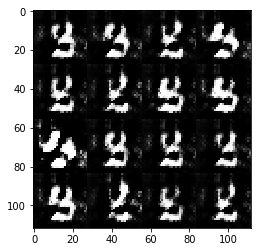

Epoch 1/2... Discriminator Loss: 0.6484... Generator Loss: 2.0316
Epoch 1/2... Discriminator Loss: 0.8214... Generator Loss: 1.5896
Epoch 1/2... Discriminator Loss: 1.7825... Generator Loss: 4.5905
Epoch 1/2... Discriminator Loss: 0.7492... Generator Loss: 2.0921
Epoch 1/2... Discriminator Loss: 0.8728... Generator Loss: 1.3486
Epoch 1/2... Discriminator Loss: 0.6529... Generator Loss: 2.0176
Epoch 1/2... Discriminator Loss: 0.6564... Generator Loss: 1.7534
Epoch 1/2... Discriminator Loss: 0.6552... Generator Loss: 2.1873
Epoch 1/2... Discriminator Loss: 0.6111... Generator Loss: 2.5927
Epoch 1/2... Discriminator Loss: 0.6321... Generator Loss: 2.4079


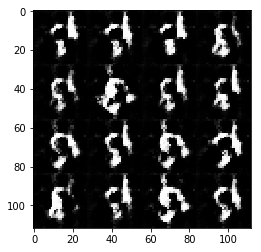

Epoch 1/2... Discriminator Loss: 0.7832... Generator Loss: 2.6300
Epoch 1/2... Discriminator Loss: 0.6369... Generator Loss: 3.0097
Epoch 1/2... Discriminator Loss: 0.7046... Generator Loss: 2.0029
Epoch 1/2... Discriminator Loss: 0.5493... Generator Loss: 2.8128
Epoch 1/2... Discriminator Loss: 1.4464... Generator Loss: 0.5815
Epoch 1/2... Discriminator Loss: 1.2611... Generator Loss: 0.8060
Epoch 1/2... Discriminator Loss: 0.9575... Generator Loss: 1.0232
Epoch 1/2... Discriminator Loss: 0.7300... Generator Loss: 2.6170
Epoch 1/2... Discriminator Loss: 0.6505... Generator Loss: 2.0991
Epoch 1/2... Discriminator Loss: 0.6160... Generator Loss: 1.9908


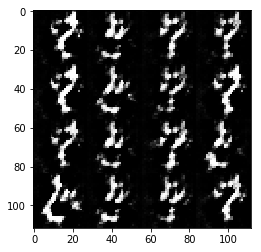

Epoch 1/2... Discriminator Loss: 1.2632... Generator Loss: 0.6600
Epoch 1/2... Discriminator Loss: 0.8066... Generator Loss: 2.1046
Epoch 1/2... Discriminator Loss: 0.8346... Generator Loss: 2.0747
Epoch 1/2... Discriminator Loss: 0.8428... Generator Loss: 2.3968
Epoch 1/2... Discriminator Loss: 0.5918... Generator Loss: 2.6728
Epoch 1/2... Discriminator Loss: 0.6773... Generator Loss: 2.0460
Epoch 1/2... Discriminator Loss: 0.7703... Generator Loss: 1.8041
Epoch 1/2... Discriminator Loss: 0.7903... Generator Loss: 1.6804
Epoch 1/2... Discriminator Loss: 0.7203... Generator Loss: 1.9633
Epoch 1/2... Discriminator Loss: 1.5038... Generator Loss: 0.5829


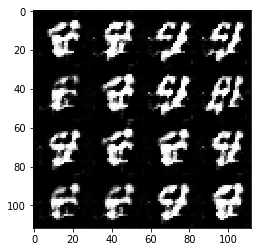

Epoch 1/2... Discriminator Loss: 0.8205... Generator Loss: 2.7824
Epoch 1/2... Discriminator Loss: 1.0574... Generator Loss: 1.7123
Epoch 1/2... Discriminator Loss: 0.7123... Generator Loss: 2.0985
Epoch 1/2... Discriminator Loss: 0.7182... Generator Loss: 1.4651
Epoch 1/2... Discriminator Loss: 0.6645... Generator Loss: 1.9373
Epoch 1/2... Discriminator Loss: 0.6399... Generator Loss: 1.8735
Epoch 1/2... Discriminator Loss: 0.5269... Generator Loss: 2.5587
Epoch 1/2... Discriminator Loss: 0.5623... Generator Loss: 2.5260
Epoch 1/2... Discriminator Loss: 0.5988... Generator Loss: 1.9351
Epoch 1/2... Discriminator Loss: 0.9047... Generator Loss: 1.1731


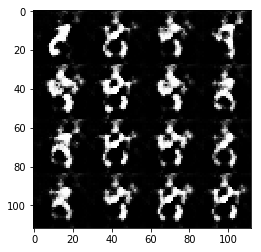

Epoch 1/2... Discriminator Loss: 0.6716... Generator Loss: 2.3003
Epoch 1/2... Discriminator Loss: 1.1599... Generator Loss: 4.4429
Epoch 1/2... Discriminator Loss: 0.6711... Generator Loss: 2.7520
Epoch 1/2... Discriminator Loss: 1.2118... Generator Loss: 3.6684
Epoch 1/2... Discriminator Loss: 0.8475... Generator Loss: 2.2342
Epoch 1/2... Discriminator Loss: 0.7522... Generator Loss: 1.6965
Epoch 1/2... Discriminator Loss: 0.9904... Generator Loss: 2.8006
Epoch 1/2... Discriminator Loss: 0.6970... Generator Loss: 1.7226
Epoch 1/2... Discriminator Loss: 0.7211... Generator Loss: 3.4130
Epoch 1/2... Discriminator Loss: 0.7741... Generator Loss: 1.3913


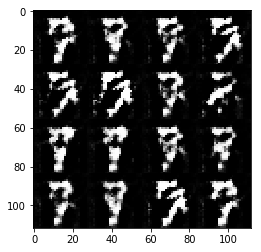

Epoch 1/2... Discriminator Loss: 0.7639... Generator Loss: 1.6367
Epoch 1/2... Discriminator Loss: 0.6205... Generator Loss: 2.0082
Epoch 1/2... Discriminator Loss: 0.9544... Generator Loss: 2.7585
Epoch 1/2... Discriminator Loss: 0.9935... Generator Loss: 1.9243
Epoch 1/2... Discriminator Loss: 0.7312... Generator Loss: 1.7935
Epoch 1/2... Discriminator Loss: 0.6609... Generator Loss: 2.3260
Epoch 1/2... Discriminator Loss: 0.6823... Generator Loss: 1.7697
Epoch 1/2... Discriminator Loss: 0.8457... Generator Loss: 2.9845
Epoch 1/2... Discriminator Loss: 0.6653... Generator Loss: 1.7150
Epoch 1/2... Discriminator Loss: 0.5729... Generator Loss: 2.4142


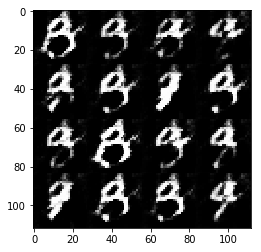

Epoch 1/2... Discriminator Loss: 0.6129... Generator Loss: 2.9242
Epoch 1/2... Discriminator Loss: 0.6551... Generator Loss: 2.1107
Epoch 1/2... Discriminator Loss: 0.8503... Generator Loss: 1.2088
Epoch 1/2... Discriminator Loss: 0.7580... Generator Loss: 3.4129
Epoch 1/2... Discriminator Loss: 0.7230... Generator Loss: 1.5252
Epoch 1/2... Discriminator Loss: 0.6638... Generator Loss: 2.0003
Epoch 1/2... Discriminator Loss: 0.9349... Generator Loss: 1.2238
Epoch 1/2... Discriminator Loss: 0.7070... Generator Loss: 1.8636
Epoch 1/2... Discriminator Loss: 0.7804... Generator Loss: 1.4198
Epoch 1/2... Discriminator Loss: 1.0228... Generator Loss: 3.2533


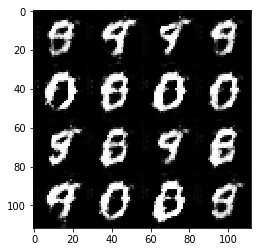

Epoch 1/2... Discriminator Loss: 0.7023... Generator Loss: 1.4826
Epoch 1/2... Discriminator Loss: 0.7214... Generator Loss: 1.5972
Epoch 1/2... Discriminator Loss: 0.7595... Generator Loss: 2.5826
Epoch 1/2... Discriminator Loss: 0.7419... Generator Loss: 1.8802
Epoch 1/2... Discriminator Loss: 0.7289... Generator Loss: 1.8861
Epoch 1/2... Discriminator Loss: 0.7860... Generator Loss: 2.0792
Epoch 1/2... Discriminator Loss: 0.6373... Generator Loss: 2.2243
Epoch 1/2... Discriminator Loss: 0.6766... Generator Loss: 3.0280
Epoch 1/2... Discriminator Loss: 0.7320... Generator Loss: 3.7986
Epoch 1/2... Discriminator Loss: 0.7088... Generator Loss: 1.9630


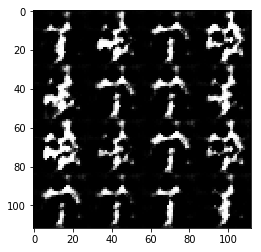

Epoch 1/2... Discriminator Loss: 0.6684... Generator Loss: 1.7799
Epoch 1/2... Discriminator Loss: 1.0290... Generator Loss: 1.1833
Epoch 1/2... Discriminator Loss: 0.7270... Generator Loss: 1.4870
Epoch 1/2... Discriminator Loss: 0.6823... Generator Loss: 2.5220
Epoch 1/2... Discriminator Loss: 0.6349... Generator Loss: 2.0897
Epoch 1/2... Discriminator Loss: 0.6471... Generator Loss: 2.6136
Epoch 1/2... Discriminator Loss: 1.0217... Generator Loss: 0.9193
Epoch 1/2... Discriminator Loss: 0.9325... Generator Loss: 2.3144
Epoch 1/2... Discriminator Loss: 0.6890... Generator Loss: 2.1667
Epoch 1/2... Discriminator Loss: 0.8363... Generator Loss: 1.2384


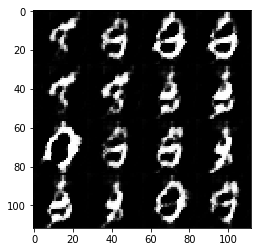

Epoch 1/2... Discriminator Loss: 0.6483... Generator Loss: 1.9193
Epoch 1/2... Discriminator Loss: 0.8720... Generator Loss: 2.7081
Epoch 1/2... Discriminator Loss: 0.8714... Generator Loss: 3.5617
Epoch 1/2... Discriminator Loss: 0.6812... Generator Loss: 1.6917
Epoch 1/2... Discriminator Loss: 0.9088... Generator Loss: 1.1430
Epoch 1/2... Discriminator Loss: 1.1260... Generator Loss: 2.5758
Epoch 1/2... Discriminator Loss: 0.9609... Generator Loss: 1.0423
Epoch 1/2... Discriminator Loss: 0.6795... Generator Loss: 2.2238
Epoch 1/2... Discriminator Loss: 0.8072... Generator Loss: 1.7046
Epoch 1/2... Discriminator Loss: 0.7830... Generator Loss: 1.7614


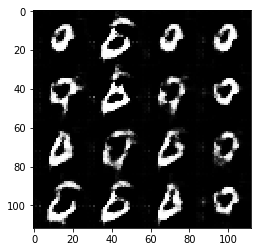

Epoch 1/2... Discriminator Loss: 0.8712... Generator Loss: 1.1814
Epoch 1/2... Discriminator Loss: 0.6834... Generator Loss: 2.5820
Epoch 1/2... Discriminator Loss: 0.8824... Generator Loss: 2.5776
Epoch 1/2... Discriminator Loss: 0.7789... Generator Loss: 1.4043
Epoch 1/2... Discriminator Loss: 0.9897... Generator Loss: 3.3743
Epoch 1/2... Discriminator Loss: 0.7907... Generator Loss: 1.7326
Epoch 1/2... Discriminator Loss: 0.7271... Generator Loss: 2.5655
Epoch 1/2... Discriminator Loss: 0.6668... Generator Loss: 2.3259
Epoch 1/2... Discriminator Loss: 0.6512... Generator Loss: 2.0156
Epoch 1/2... Discriminator Loss: 0.7804... Generator Loss: 1.4904


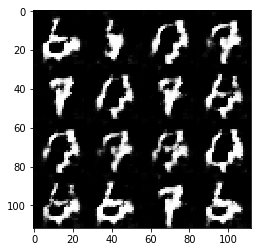

Epoch 1/2... Discriminator Loss: 0.7044... Generator Loss: 1.9973
Epoch 1/2... Discriminator Loss: 0.7592... Generator Loss: 1.7498
Epoch 1/2... Discriminator Loss: 0.7858... Generator Loss: 1.3663
Epoch 1/2... Discriminator Loss: 0.8619... Generator Loss: 1.1719
Epoch 1/2... Discriminator Loss: 0.6790... Generator Loss: 2.6566
Epoch 1/2... Discriminator Loss: 0.5959... Generator Loss: 2.2572
Epoch 1/2... Discriminator Loss: 1.2446... Generator Loss: 2.9494
Epoch 2/2... Discriminator Loss: 0.7426... Generator Loss: 2.0537
Epoch 2/2... Discriminator Loss: 1.4746... Generator Loss: 4.1235
Epoch 2/2... Discriminator Loss: 0.7313... Generator Loss: 2.0955


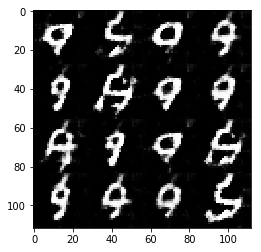

Epoch 2/2... Discriminator Loss: 0.8010... Generator Loss: 1.3426
Epoch 2/2... Discriminator Loss: 0.7428... Generator Loss: 1.7987
Epoch 2/2... Discriminator Loss: 0.7226... Generator Loss: 2.6018
Epoch 2/2... Discriminator Loss: 1.0114... Generator Loss: 1.0043
Epoch 2/2... Discriminator Loss: 0.7561... Generator Loss: 1.8627
Epoch 2/2... Discriminator Loss: 0.6112... Generator Loss: 2.5712
Epoch 2/2... Discriminator Loss: 0.9027... Generator Loss: 1.3496
Epoch 2/2... Discriminator Loss: 0.9965... Generator Loss: 1.2673
Epoch 2/2... Discriminator Loss: 1.2996... Generator Loss: 0.6033
Epoch 2/2... Discriminator Loss: 0.8054... Generator Loss: 1.4137


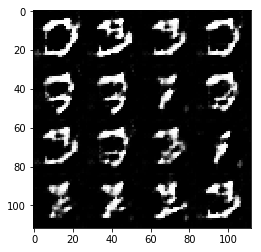

Epoch 2/2... Discriminator Loss: 0.8166... Generator Loss: 1.2814
Epoch 2/2... Discriminator Loss: 0.6328... Generator Loss: 2.1667
Epoch 2/2... Discriminator Loss: 0.6205... Generator Loss: 2.3895
Epoch 2/2... Discriminator Loss: 0.7519... Generator Loss: 2.7940
Epoch 2/2... Discriminator Loss: 0.8516... Generator Loss: 1.3236
Epoch 2/2... Discriminator Loss: 0.7476... Generator Loss: 1.6557
Epoch 2/2... Discriminator Loss: 0.8830... Generator Loss: 1.1824
Epoch 2/2... Discriminator Loss: 1.0549... Generator Loss: 0.9470
Epoch 2/2... Discriminator Loss: 0.8109... Generator Loss: 1.5119
Epoch 2/2... Discriminator Loss: 0.9022... Generator Loss: 2.1724


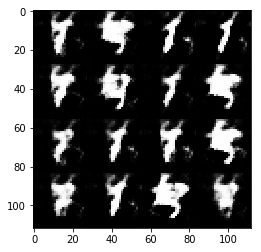

Epoch 2/2... Discriminator Loss: 0.6826... Generator Loss: 2.7591
Epoch 2/2... Discriminator Loss: 0.6470... Generator Loss: 1.8839
Epoch 2/2... Discriminator Loss: 0.6747... Generator Loss: 2.1297
Epoch 2/2... Discriminator Loss: 0.6591... Generator Loss: 1.8227
Epoch 2/2... Discriminator Loss: 0.6656... Generator Loss: 1.8245
Epoch 2/2... Discriminator Loss: 0.8832... Generator Loss: 1.2788
Epoch 2/2... Discriminator Loss: 0.7535... Generator Loss: 2.5535
Epoch 2/2... Discriminator Loss: 0.7143... Generator Loss: 1.9535
Epoch 2/2... Discriminator Loss: 0.7647... Generator Loss: 3.1332
Epoch 2/2... Discriminator Loss: 0.5440... Generator Loss: 2.3069


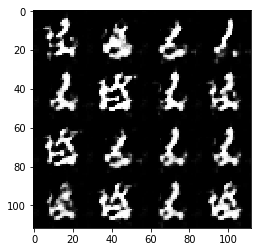

Epoch 2/2... Discriminator Loss: 0.7496... Generator Loss: 3.1560
Epoch 2/2... Discriminator Loss: 0.5655... Generator Loss: 2.5628
Epoch 2/2... Discriminator Loss: 0.7256... Generator Loss: 1.6572
Epoch 2/2... Discriminator Loss: 0.6755... Generator Loss: 1.9926
Epoch 2/2... Discriminator Loss: 0.5746... Generator Loss: 2.4480
Epoch 2/2... Discriminator Loss: 0.7303... Generator Loss: 1.5644
Epoch 2/2... Discriminator Loss: 1.3259... Generator Loss: 0.5940
Epoch 2/2... Discriminator Loss: 0.6726... Generator Loss: 2.1112
Epoch 2/2... Discriminator Loss: 0.7771... Generator Loss: 2.3731
Epoch 2/2... Discriminator Loss: 0.8223... Generator Loss: 1.5688


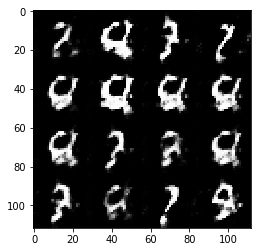

Epoch 2/2... Discriminator Loss: 0.6204... Generator Loss: 2.6478
Epoch 2/2... Discriminator Loss: 1.0284... Generator Loss: 0.9444
Epoch 2/2... Discriminator Loss: 0.5892... Generator Loss: 2.1628
Epoch 2/2... Discriminator Loss: 0.8407... Generator Loss: 2.1744
Epoch 2/2... Discriminator Loss: 0.6549... Generator Loss: 2.1818
Epoch 2/2... Discriminator Loss: 0.6499... Generator Loss: 2.3129
Epoch 2/2... Discriminator Loss: 0.6719... Generator Loss: 2.0952
Epoch 2/2... Discriminator Loss: 0.6995... Generator Loss: 1.7459
Epoch 2/2... Discriminator Loss: 0.7990... Generator Loss: 1.4585
Epoch 2/2... Discriminator Loss: 0.8394... Generator Loss: 3.4081


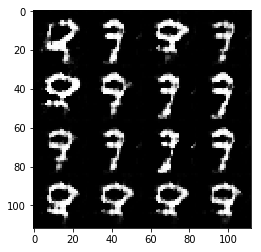

Epoch 2/2... Discriminator Loss: 0.7102... Generator Loss: 2.2263
Epoch 2/2... Discriminator Loss: 0.7922... Generator Loss: 1.6581
Epoch 2/2... Discriminator Loss: 0.7079... Generator Loss: 2.6583
Epoch 2/2... Discriminator Loss: 0.7772... Generator Loss: 1.6508
Epoch 2/2... Discriminator Loss: 0.6167... Generator Loss: 2.2434
Epoch 2/2... Discriminator Loss: 0.9253... Generator Loss: 1.1610
Epoch 2/2... Discriminator Loss: 0.5753... Generator Loss: 2.7539
Epoch 2/2... Discriminator Loss: 0.6332... Generator Loss: 2.5491
Epoch 2/2... Discriminator Loss: 0.8753... Generator Loss: 1.1768
Epoch 2/2... Discriminator Loss: 0.8325... Generator Loss: 1.3203


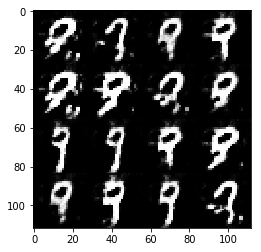

Epoch 2/2... Discriminator Loss: 0.6415... Generator Loss: 2.2351
Epoch 2/2... Discriminator Loss: 0.5379... Generator Loss: 2.4150
Epoch 2/2... Discriminator Loss: 1.0567... Generator Loss: 0.8444
Epoch 2/2... Discriminator Loss: 0.7993... Generator Loss: 2.2873
Epoch 2/2... Discriminator Loss: 0.7784... Generator Loss: 1.7646
Epoch 2/2... Discriminator Loss: 0.8138... Generator Loss: 1.3705
Epoch 2/2... Discriminator Loss: 0.6386... Generator Loss: 1.9948
Epoch 2/2... Discriminator Loss: 0.7236... Generator Loss: 1.6848
Epoch 2/2... Discriminator Loss: 0.7535... Generator Loss: 2.2958
Epoch 2/2... Discriminator Loss: 0.6421... Generator Loss: 2.4484


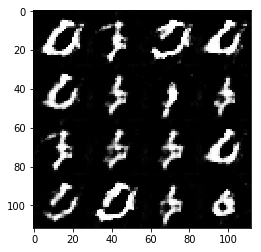

Epoch 2/2... Discriminator Loss: 0.6759... Generator Loss: 1.7711
Epoch 2/2... Discriminator Loss: 0.7024... Generator Loss: 1.7594
Epoch 2/2... Discriminator Loss: 0.7468... Generator Loss: 1.6196
Epoch 2/2... Discriminator Loss: 0.6454... Generator Loss: 1.8225
Epoch 2/2... Discriminator Loss: 0.8889... Generator Loss: 1.1642
Epoch 2/2... Discriminator Loss: 0.9411... Generator Loss: 1.1662
Epoch 2/2... Discriminator Loss: 1.0658... Generator Loss: 2.7620
Epoch 2/2... Discriminator Loss: 0.7221... Generator Loss: 2.2041
Epoch 2/2... Discriminator Loss: 0.7045... Generator Loss: 2.0184
Epoch 2/2... Discriminator Loss: 0.6444... Generator Loss: 2.1099


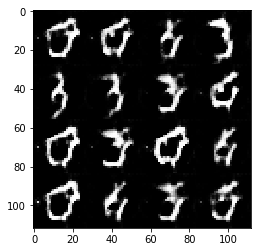

Epoch 2/2... Discriminator Loss: 0.9188... Generator Loss: 1.2111
Epoch 2/2... Discriminator Loss: 1.7460... Generator Loss: 4.3898
Epoch 2/2... Discriminator Loss: 1.1003... Generator Loss: 0.9092
Epoch 2/2... Discriminator Loss: 0.7153... Generator Loss: 2.4492
Epoch 2/2... Discriminator Loss: 0.7725... Generator Loss: 2.9623
Epoch 2/2... Discriminator Loss: 0.7037... Generator Loss: 2.3553
Epoch 2/2... Discriminator Loss: 0.7910... Generator Loss: 1.6119
Epoch 2/2... Discriminator Loss: 0.6881... Generator Loss: 2.5351
Epoch 2/2... Discriminator Loss: 0.7615... Generator Loss: 1.4641
Epoch 2/2... Discriminator Loss: 0.6492... Generator Loss: 2.7812


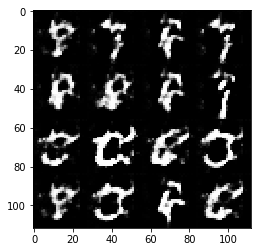

Epoch 2/2... Discriminator Loss: 0.8414... Generator Loss: 2.5858
Epoch 2/2... Discriminator Loss: 0.8450... Generator Loss: 1.2822
Epoch 2/2... Discriminator Loss: 0.8500... Generator Loss: 1.4998
Epoch 2/2... Discriminator Loss: 0.7043... Generator Loss: 1.6114
Epoch 2/2... Discriminator Loss: 0.7042... Generator Loss: 2.5992
Epoch 2/2... Discriminator Loss: 0.7067... Generator Loss: 2.0008
Epoch 2/2... Discriminator Loss: 0.7119... Generator Loss: 1.6533
Epoch 2/2... Discriminator Loss: 0.8215... Generator Loss: 1.4995
Epoch 2/2... Discriminator Loss: 0.7383... Generator Loss: 1.5706
Epoch 2/2... Discriminator Loss: 0.7636... Generator Loss: 1.7102


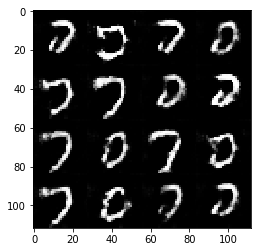

Epoch 2/2... Discriminator Loss: 0.7798... Generator Loss: 1.5560
Epoch 2/2... Discriminator Loss: 0.6127... Generator Loss: 2.7474
Epoch 2/2... Discriminator Loss: 0.8729... Generator Loss: 1.3781
Epoch 2/2... Discriminator Loss: 0.8361... Generator Loss: 1.3213
Epoch 2/2... Discriminator Loss: 0.8072... Generator Loss: 2.0900
Epoch 2/2... Discriminator Loss: 0.9577... Generator Loss: 1.3125
Epoch 2/2... Discriminator Loss: 0.7310... Generator Loss: 1.5394
Epoch 2/2... Discriminator Loss: 0.8045... Generator Loss: 1.6321
Epoch 2/2... Discriminator Loss: 1.0135... Generator Loss: 1.0496
Epoch 2/2... Discriminator Loss: 1.0083... Generator Loss: 3.7561


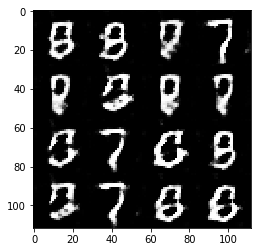

Epoch 2/2... Discriminator Loss: 0.9490... Generator Loss: 2.7200
Epoch 2/2... Discriminator Loss: 0.8554... Generator Loss: 1.0965
Epoch 2/2... Discriminator Loss: 0.7311... Generator Loss: 2.2607
Epoch 2/2... Discriminator Loss: 0.6628... Generator Loss: 2.3149
Epoch 2/2... Discriminator Loss: 0.8646... Generator Loss: 1.5203
Epoch 2/2... Discriminator Loss: 1.0043... Generator Loss: 3.1048
Epoch 2/2... Discriminator Loss: 1.1348... Generator Loss: 0.8167
Epoch 2/2... Discriminator Loss: 0.7008... Generator Loss: 1.9030
Epoch 2/2... Discriminator Loss: 0.7234... Generator Loss: 2.3538
Epoch 2/2... Discriminator Loss: 0.8213... Generator Loss: 3.0681


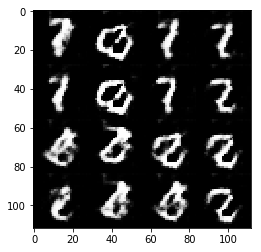

Epoch 2/2... Discriminator Loss: 0.7335... Generator Loss: 2.2592
Epoch 2/2... Discriminator Loss: 1.0836... Generator Loss: 0.8647
Epoch 2/2... Discriminator Loss: 0.7385... Generator Loss: 1.3983
Epoch 2/2... Discriminator Loss: 1.1715... Generator Loss: 0.8410
Epoch 2/2... Discriminator Loss: 0.8709... Generator Loss: 1.1733
Epoch 2/2... Discriminator Loss: 0.7556... Generator Loss: 1.6367
Epoch 2/2... Discriminator Loss: 0.9341... Generator Loss: 1.2120
Epoch 2/2... Discriminator Loss: 0.7563... Generator Loss: 3.0228
Epoch 2/2... Discriminator Loss: 0.7472... Generator Loss: 1.5186
Epoch 2/2... Discriminator Loss: 0.6918... Generator Loss: 1.8713


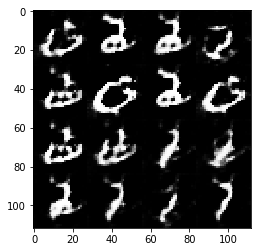

Epoch 2/2... Discriminator Loss: 0.8571... Generator Loss: 1.5945
Epoch 2/2... Discriminator Loss: 1.0405... Generator Loss: 0.9150
Epoch 2/2... Discriminator Loss: 0.6656... Generator Loss: 2.0088
Epoch 2/2... Discriminator Loss: 0.7255... Generator Loss: 1.6592
Epoch 2/2... Discriminator Loss: 0.8353... Generator Loss: 1.4453
Epoch 2/2... Discriminator Loss: 0.7148... Generator Loss: 2.0932
Epoch 2/2... Discriminator Loss: 1.0777... Generator Loss: 0.8957
Epoch 2/2... Discriminator Loss: 0.9715... Generator Loss: 1.1702
Epoch 2/2... Discriminator Loss: 0.8641... Generator Loss: 2.0969
Epoch 2/2... Discriminator Loss: 0.6791... Generator Loss: 2.0233


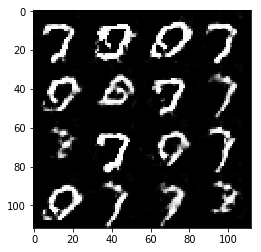

Epoch 2/2... Discriminator Loss: 0.7088... Generator Loss: 1.9679
Epoch 2/2... Discriminator Loss: 0.7179... Generator Loss: 1.9486
Epoch 2/2... Discriminator Loss: 0.9275... Generator Loss: 1.1697
Epoch 2/2... Discriminator Loss: 0.9144... Generator Loss: 2.4772
Epoch 2/2... Discriminator Loss: 0.9777... Generator Loss: 2.8821
Epoch 2/2... Discriminator Loss: 0.8314... Generator Loss: 1.5131
Epoch 2/2... Discriminator Loss: 0.9617... Generator Loss: 3.2151
Epoch 2/2... Discriminator Loss: 0.9109... Generator Loss: 2.3975
Epoch 2/2... Discriminator Loss: 0.7220... Generator Loss: 1.9119
Epoch 2/2... Discriminator Loss: 0.7881... Generator Loss: 2.1982


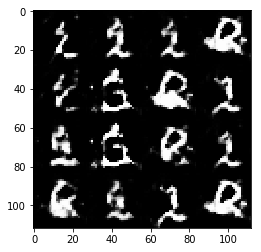

Epoch 2/2... Discriminator Loss: 1.0195... Generator Loss: 1.0342
Epoch 2/2... Discriminator Loss: 1.2887... Generator Loss: 4.1803
Epoch 2/2... Discriminator Loss: 0.6693... Generator Loss: 1.6646
Epoch 2/2... Discriminator Loss: 0.6810... Generator Loss: 1.9845
Epoch 2/2... Discriminator Loss: 0.9703... Generator Loss: 1.0603
Epoch 2/2... Discriminator Loss: 0.7814... Generator Loss: 1.5513
Epoch 2/2... Discriminator Loss: 0.7909... Generator Loss: 3.3997
Epoch 2/2... Discriminator Loss: 0.8016... Generator Loss: 1.5336
Epoch 2/2... Discriminator Loss: 0.6760... Generator Loss: 2.5255
Epoch 2/2... Discriminator Loss: 0.8275... Generator Loss: 2.1783


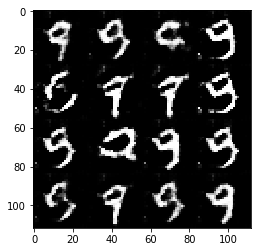

Epoch 2/2... Discriminator Loss: 0.7047... Generator Loss: 2.0125
Epoch 2/2... Discriminator Loss: 0.7258... Generator Loss: 1.6896
Epoch 2/2... Discriminator Loss: 1.2676... Generator Loss: 3.5801
Epoch 2/2... Discriminator Loss: 0.6620... Generator Loss: 2.3967
Epoch 2/2... Discriminator Loss: 1.0371... Generator Loss: 1.5761
Epoch 2/2... Discriminator Loss: 1.0205... Generator Loss: 2.5211
Epoch 2/2... Discriminator Loss: 0.7659... Generator Loss: 2.1016
Epoch 2/2... Discriminator Loss: 1.1004... Generator Loss: 0.8483
Epoch 2/2... Discriminator Loss: 0.7264... Generator Loss: 2.1654
Epoch 2/2... Discriminator Loss: 0.7008... Generator Loss: 2.3102


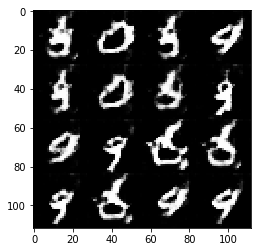

Epoch 2/2... Discriminator Loss: 0.7666... Generator Loss: 1.8040
Epoch 2/2... Discriminator Loss: 0.7691... Generator Loss: 1.3765
Epoch 2/2... Discriminator Loss: 0.7788... Generator Loss: 2.0531
Epoch 2/2... Discriminator Loss: 0.9964... Generator Loss: 1.8504
Epoch 2/2... Discriminator Loss: 0.8401... Generator Loss: 1.3133
Epoch 2/2... Discriminator Loss: 0.7611... Generator Loss: 1.7986
Epoch 2/2... Discriminator Loss: 0.7410... Generator Loss: 1.6743
Epoch 2/2... Discriminator Loss: 0.8366... Generator Loss: 1.6014
Epoch 2/2... Discriminator Loss: 0.7488... Generator Loss: 2.9236
Epoch 2/2... Discriminator Loss: 0.6696... Generator Loss: 2.2134


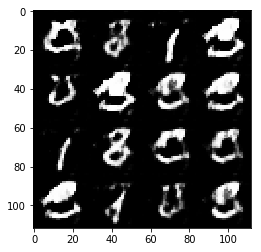

Epoch 2/2... Discriminator Loss: 0.6789... Generator Loss: 2.2532
Epoch 2/2... Discriminator Loss: 0.8707... Generator Loss: 1.2331
Epoch 2/2... Discriminator Loss: 0.8350... Generator Loss: 1.2606
Epoch 2/2... Discriminator Loss: 1.3220... Generator Loss: 0.7648
Epoch 2/2... Discriminator Loss: 0.8389... Generator Loss: 1.6480


In [ ]:
batch_size = 32
z_dim = 128
learning_rate = 0.0001
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.3627... Generator Loss: 0.8181
Epoch 1/1... Discriminator Loss: 1.4533... Generator Loss: 0.6910
Epoch 1/1... Discriminator Loss: 0.9201... Generator Loss: 1.3254
Epoch 1/1... Discriminator Loss: 1.2687... Generator Loss: 0.6396
Epoch 1/1... Discriminator Loss: 0.8144... Generator Loss: 1.3443
Epoch 1/1... Discriminator Loss: 0.9505... Generator Loss: 1.0428
Epoch 1/1... Discriminator Loss: 0.9130... Generator Loss: 1.2762
Epoch 1/1... Discriminator Loss: 0.9299... Generator Loss: 2.0609
Epoch 1/1... Discriminator Loss: 0.9417... Generator Loss: 1.0097
Epoch 1/1... Discriminator Loss: 1.1375... Generator Loss: 0.7999


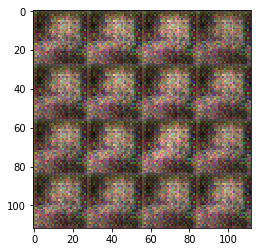

Epoch 1/1... Discriminator Loss: 0.9159... Generator Loss: 1.1190
Epoch 1/1... Discriminator Loss: 0.9358... Generator Loss: 1.2859
Epoch 1/1... Discriminator Loss: 0.9012... Generator Loss: 1.3707
Epoch 1/1... Discriminator Loss: 0.8990... Generator Loss: 1.3689
Epoch 1/1... Discriminator Loss: 0.7788... Generator Loss: 1.6864
Epoch 1/1... Discriminator Loss: 0.6456... Generator Loss: 1.9419
Epoch 1/1... Discriminator Loss: 0.6763... Generator Loss: 2.0295
Epoch 1/1... Discriminator Loss: 0.6164... Generator Loss: 2.0834
Epoch 1/1... Discriminator Loss: 0.6666... Generator Loss: 1.8929
Epoch 1/1... Discriminator Loss: 1.4355... Generator Loss: 3.7475


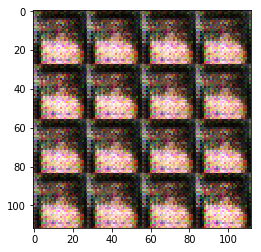

Epoch 1/1... Discriminator Loss: 0.7324... Generator Loss: 1.8430
Epoch 1/1... Discriminator Loss: 0.9142... Generator Loss: 1.4255
Epoch 1/1... Discriminator Loss: 1.2005... Generator Loss: 0.7595
Epoch 1/1... Discriminator Loss: 1.0388... Generator Loss: 0.9200
Epoch 1/1... Discriminator Loss: 0.7174... Generator Loss: 1.6942
Epoch 1/1... Discriminator Loss: 0.7807... Generator Loss: 1.4821
Epoch 1/1... Discriminator Loss: 0.8694... Generator Loss: 2.9814
Epoch 1/1... Discriminator Loss: 0.7166... Generator Loss: 1.8959
Epoch 1/1... Discriminator Loss: 0.7139... Generator Loss: 1.8882
Epoch 1/1... Discriminator Loss: 0.8027... Generator Loss: 2.0390


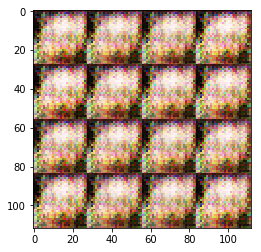

Epoch 1/1... Discriminator Loss: 0.7912... Generator Loss: 1.4704
Epoch 1/1... Discriminator Loss: 2.1068... Generator Loss: 5.3230
Epoch 1/1... Discriminator Loss: 0.6770... Generator Loss: 1.5481
Epoch 1/1... Discriminator Loss: 0.8622... Generator Loss: 1.7482
Epoch 1/1... Discriminator Loss: 0.6684... Generator Loss: 2.0110
Epoch 1/1... Discriminator Loss: 0.7629... Generator Loss: 2.1833
Epoch 1/1... Discriminator Loss: 0.7497... Generator Loss: 3.0788
Epoch 1/1... Discriminator Loss: 0.8025... Generator Loss: 1.3599
Epoch 1/1... Discriminator Loss: 0.8737... Generator Loss: 1.1392
Epoch 1/1... Discriminator Loss: 0.5793... Generator Loss: 2.4542


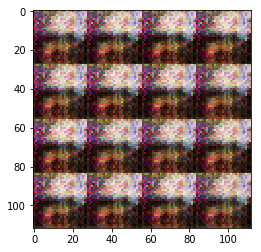

Epoch 1/1... Discriminator Loss: 0.6378... Generator Loss: 1.7265
Epoch 1/1... Discriminator Loss: 0.6263... Generator Loss: 1.9773
Epoch 1/1... Discriminator Loss: 1.0968... Generator Loss: 0.8771
Epoch 1/1... Discriminator Loss: 0.8087... Generator Loss: 2.0405
Epoch 1/1... Discriminator Loss: 0.9575... Generator Loss: 2.3451
Epoch 1/1... Discriminator Loss: 1.9629... Generator Loss: 5.5608
Epoch 1/1... Discriminator Loss: 0.8916... Generator Loss: 1.4648
Epoch 1/1... Discriminator Loss: 0.9547... Generator Loss: 1.1309
Epoch 1/1... Discriminator Loss: 1.0116... Generator Loss: 0.8866
Epoch 1/1... Discriminator Loss: 0.6025... Generator Loss: 1.9636


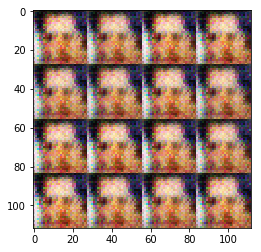

Epoch 1/1... Discriminator Loss: 0.5606... Generator Loss: 2.3848
Epoch 1/1... Discriminator Loss: 0.8151... Generator Loss: 1.6436
Epoch 1/1... Discriminator Loss: 0.6875... Generator Loss: 1.9501
Epoch 1/1... Discriminator Loss: 1.3942... Generator Loss: 3.4883
Epoch 1/1... Discriminator Loss: 0.8487... Generator Loss: 3.1236
Epoch 1/1... Discriminator Loss: 0.7805... Generator Loss: 1.7916
Epoch 1/1... Discriminator Loss: 0.5861... Generator Loss: 2.1878
Epoch 1/1... Discriminator Loss: 0.6385... Generator Loss: 1.7682
Epoch 1/1... Discriminator Loss: 0.7502... Generator Loss: 1.8113
Epoch 1/1... Discriminator Loss: 0.4542... Generator Loss: 3.1241


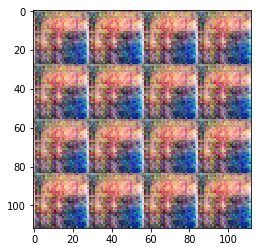

Epoch 1/1... Discriminator Loss: 0.5369... Generator Loss: 2.4525
Epoch 1/1... Discriminator Loss: 0.4654... Generator Loss: 2.6631
Epoch 1/1... Discriminator Loss: 0.4966... Generator Loss: 2.6389
Epoch 1/1... Discriminator Loss: 0.5671... Generator Loss: 2.6493
Epoch 1/1... Discriminator Loss: 0.6495... Generator Loss: 2.1659
Epoch 1/1... Discriminator Loss: 0.8659... Generator Loss: 2.4561
Epoch 1/1... Discriminator Loss: 0.6760... Generator Loss: 2.0295
Epoch 1/1... Discriminator Loss: 0.7348... Generator Loss: 1.6214
Epoch 1/1... Discriminator Loss: 0.5559... Generator Loss: 2.6359
Epoch 1/1... Discriminator Loss: 0.6099... Generator Loss: 1.8720


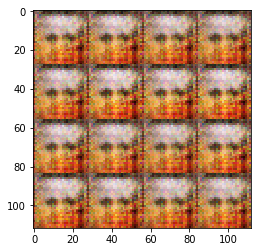

Epoch 1/1... Discriminator Loss: 0.5899... Generator Loss: 2.1555
Epoch 1/1... Discriminator Loss: 0.6423... Generator Loss: 2.2469
Epoch 1/1... Discriminator Loss: 0.7022... Generator Loss: 2.0919
Epoch 1/1... Discriminator Loss: 0.5980... Generator Loss: 2.2768
Epoch 1/1... Discriminator Loss: 0.6394... Generator Loss: 3.4437
Epoch 1/1... Discriminator Loss: 0.7065... Generator Loss: 1.5442
Epoch 1/1... Discriminator Loss: 1.7261... Generator Loss: 5.4386
Epoch 1/1... Discriminator Loss: 0.8246... Generator Loss: 1.2523
Epoch 1/1... Discriminator Loss: 0.7085... Generator Loss: 1.5261
Epoch 1/1... Discriminator Loss: 0.6698... Generator Loss: 2.5402


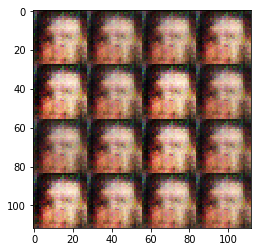

Epoch 1/1... Discriminator Loss: 0.6504... Generator Loss: 4.2358
Epoch 1/1... Discriminator Loss: 0.6767... Generator Loss: 1.8234
Epoch 1/1... Discriminator Loss: 0.4670... Generator Loss: 2.8934
Epoch 1/1... Discriminator Loss: 0.6130... Generator Loss: 2.0663
Epoch 1/1... Discriminator Loss: 1.4866... Generator Loss: 3.8664
Epoch 1/1... Discriminator Loss: 1.3745... Generator Loss: 0.7308
Epoch 1/1... Discriminator Loss: 1.0256... Generator Loss: 2.2688
Epoch 1/1... Discriminator Loss: 1.7408... Generator Loss: 3.0378
Epoch 1/1... Discriminator Loss: 0.8027... Generator Loss: 1.3885
Epoch 1/1... Discriminator Loss: 0.7593... Generator Loss: 1.6237


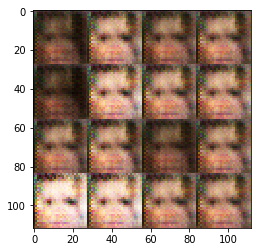

Epoch 1/1... Discriminator Loss: 1.4049... Generator Loss: 0.8747
Epoch 1/1... Discriminator Loss: 0.8956... Generator Loss: 1.3053
Epoch 1/1... Discriminator Loss: 1.2596... Generator Loss: 1.4675
Epoch 1/1... Discriminator Loss: 1.0882... Generator Loss: 0.9747
Epoch 1/1... Discriminator Loss: 1.3518... Generator Loss: 2.3592
Epoch 1/1... Discriminator Loss: 1.1023... Generator Loss: 1.2521
Epoch 1/1... Discriminator Loss: 1.0292... Generator Loss: 1.8555
Epoch 1/1... Discriminator Loss: 1.4532... Generator Loss: 0.6722
Epoch 1/1... Discriminator Loss: 1.5979... Generator Loss: 0.5439
Epoch 1/1... Discriminator Loss: 1.4899... Generator Loss: 0.6476


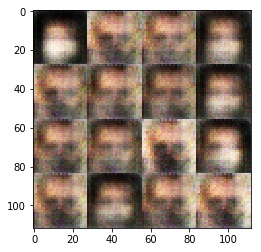

Epoch 1/1... Discriminator Loss: 1.5100... Generator Loss: 0.6365
Epoch 1/1... Discriminator Loss: 1.3071... Generator Loss: 0.9772
Epoch 1/1... Discriminator Loss: 1.4162... Generator Loss: 1.5245
Epoch 1/1... Discriminator Loss: 1.1961... Generator Loss: 1.0736
Epoch 1/1... Discriminator Loss: 1.5316... Generator Loss: 0.4826
Epoch 1/1... Discriminator Loss: 1.3853... Generator Loss: 2.0982
Epoch 1/1... Discriminator Loss: 1.1606... Generator Loss: 1.3871
Epoch 1/1... Discriminator Loss: 1.6007... Generator Loss: 1.1060
Epoch 1/1... Discriminator Loss: 1.2993... Generator Loss: 1.4919
Epoch 1/1... Discriminator Loss: 1.2354... Generator Loss: 0.8253


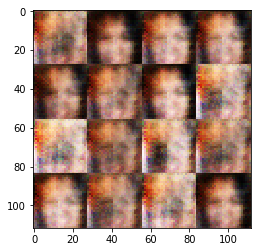

Epoch 1/1... Discriminator Loss: 1.3952... Generator Loss: 0.8497
Epoch 1/1... Discriminator Loss: 1.2552... Generator Loss: 0.9634
Epoch 1/1... Discriminator Loss: 1.2164... Generator Loss: 0.8629
Epoch 1/1... Discriminator Loss: 1.3331... Generator Loss: 0.7082
Epoch 1/1... Discriminator Loss: 1.1594... Generator Loss: 1.2316
Epoch 1/1... Discriminator Loss: 1.1062... Generator Loss: 1.3842
Epoch 1/1... Discriminator Loss: 1.2232... Generator Loss: 0.9635
Epoch 1/1... Discriminator Loss: 1.4397... Generator Loss: 0.7938
Epoch 1/1... Discriminator Loss: 1.4246... Generator Loss: 0.9330
Epoch 1/1... Discriminator Loss: 1.2001... Generator Loss: 0.9912


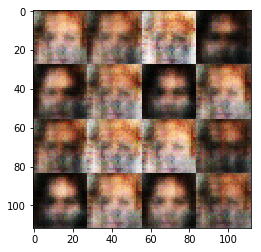

Epoch 1/1... Discriminator Loss: 1.2669... Generator Loss: 1.1604
Epoch 1/1... Discriminator Loss: 1.5815... Generator Loss: 1.5178
Epoch 1/1... Discriminator Loss: 1.3780... Generator Loss: 0.6691
Epoch 1/1... Discriminator Loss: 1.3222... Generator Loss: 0.8140
Epoch 1/1... Discriminator Loss: 1.2569... Generator Loss: 1.0188
Epoch 1/1... Discriminator Loss: 1.4713... Generator Loss: 1.1196
Epoch 1/1... Discriminator Loss: 1.4387... Generator Loss: 0.7385
Epoch 1/1... Discriminator Loss: 1.4394... Generator Loss: 0.7125
Epoch 1/1... Discriminator Loss: 1.4097... Generator Loss: 0.6629
Epoch 1/1... Discriminator Loss: 1.2892... Generator Loss: 0.8518


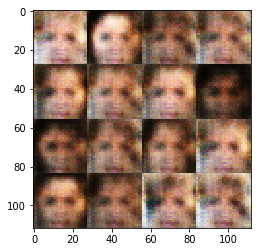

Epoch 1/1... Discriminator Loss: 1.5845... Generator Loss: 0.5134
Epoch 1/1... Discriminator Loss: 1.4464... Generator Loss: 0.8168
Epoch 1/1... Discriminator Loss: 1.3123... Generator Loss: 1.0550
Epoch 1/1... Discriminator Loss: 1.5916... Generator Loss: 1.5012
Epoch 1/1... Discriminator Loss: 1.5456... Generator Loss: 1.1015
Epoch 1/1... Discriminator Loss: 1.3472... Generator Loss: 0.7386
Epoch 1/1... Discriminator Loss: 1.2326... Generator Loss: 1.0277
Epoch 1/1... Discriminator Loss: 1.5216... Generator Loss: 0.5232
Epoch 1/1... Discriminator Loss: 1.4405... Generator Loss: 0.7445
Epoch 1/1... Discriminator Loss: 1.2474... Generator Loss: 1.0659


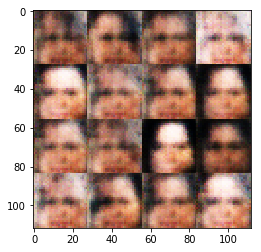

Epoch 1/1... Discriminator Loss: 1.1642... Generator Loss: 0.9518
Epoch 1/1... Discriminator Loss: 1.2745... Generator Loss: 1.0176
Epoch 1/1... Discriminator Loss: 1.2317... Generator Loss: 0.9828
Epoch 1/1... Discriminator Loss: 1.3692... Generator Loss: 0.7367
Epoch 1/1... Discriminator Loss: 1.4528... Generator Loss: 0.5330
Epoch 1/1... Discriminator Loss: 1.2572... Generator Loss: 1.1335
Epoch 1/1... Discriminator Loss: 1.5075... Generator Loss: 0.5492
Epoch 1/1... Discriminator Loss: 1.3971... Generator Loss: 0.7580
Epoch 1/1... Discriminator Loss: 1.2609... Generator Loss: 0.8858
Epoch 1/1... Discriminator Loss: 1.2985... Generator Loss: 0.7667


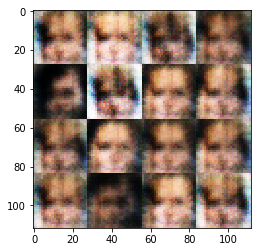

Epoch 1/1... Discriminator Loss: 1.3654... Generator Loss: 0.9150
Epoch 1/1... Discriminator Loss: 1.3114... Generator Loss: 1.1577
Epoch 1/1... Discriminator Loss: 1.2426... Generator Loss: 1.0588
Epoch 1/1... Discriminator Loss: 1.4067... Generator Loss: 0.6702
Epoch 1/1... Discriminator Loss: 1.3263... Generator Loss: 0.6760
Epoch 1/1... Discriminator Loss: 1.3088... Generator Loss: 0.7965
Epoch 1/1... Discriminator Loss: 1.2949... Generator Loss: 0.9418
Epoch 1/1... Discriminator Loss: 1.2703... Generator Loss: 1.0128
Epoch 1/1... Discriminator Loss: 1.3721... Generator Loss: 0.9371
Epoch 1/1... Discriminator Loss: 1.4359... Generator Loss: 0.6283


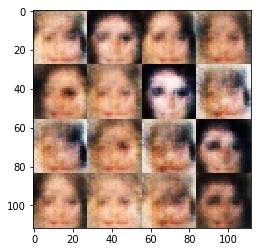

Epoch 1/1... Discriminator Loss: 1.4529... Generator Loss: 1.4021
Epoch 1/1... Discriminator Loss: 1.4186... Generator Loss: 0.6844
Epoch 1/1... Discriminator Loss: 1.5279... Generator Loss: 0.5476
Epoch 1/1... Discriminator Loss: 1.3550... Generator Loss: 0.7045
Epoch 1/1... Discriminator Loss: 1.2399... Generator Loss: 0.9829
Epoch 1/1... Discriminator Loss: 1.2525... Generator Loss: 1.1364
Epoch 1/1... Discriminator Loss: 1.3686... Generator Loss: 0.7376
Epoch 1/1... Discriminator Loss: 1.3782... Generator Loss: 1.1780
Epoch 1/1... Discriminator Loss: 1.1454... Generator Loss: 1.1137
Epoch 1/1... Discriminator Loss: 1.3462... Generator Loss: 0.9206


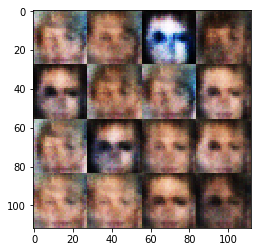

Epoch 1/1... Discriminator Loss: 1.3280... Generator Loss: 0.9693
Epoch 1/1... Discriminator Loss: 1.2514... Generator Loss: 0.7755
Epoch 1/1... Discriminator Loss: 1.2920... Generator Loss: 0.8690
Epoch 1/1... Discriminator Loss: 1.2338... Generator Loss: 0.8377
Epoch 1/1... Discriminator Loss: 1.2340... Generator Loss: 0.8695
Epoch 1/1... Discriminator Loss: 1.3387... Generator Loss: 0.7599
Epoch 1/1... Discriminator Loss: 1.3208... Generator Loss: 0.7018
Epoch 1/1... Discriminator Loss: 1.3308... Generator Loss: 0.6775
Epoch 1/1... Discriminator Loss: 1.4245... Generator Loss: 1.3697
Epoch 1/1... Discriminator Loss: 1.2532... Generator Loss: 0.7806


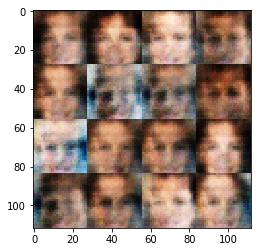

Epoch 1/1... Discriminator Loss: 1.2393... Generator Loss: 1.1513
Epoch 1/1... Discriminator Loss: 1.2316... Generator Loss: 0.7758
Epoch 1/1... Discriminator Loss: 1.1932... Generator Loss: 1.1654
Epoch 1/1... Discriminator Loss: 1.2762... Generator Loss: 1.1943
Epoch 1/1... Discriminator Loss: 1.1779... Generator Loss: 1.0560
Epoch 1/1... Discriminator Loss: 1.1278... Generator Loss: 0.9646
Epoch 1/1... Discriminator Loss: 1.3240... Generator Loss: 0.6374
Epoch 1/1... Discriminator Loss: 1.2878... Generator Loss: 0.7500
Epoch 1/1... Discriminator Loss: 1.3866... Generator Loss: 1.2888
Epoch 1/1... Discriminator Loss: 1.4127... Generator Loss: 0.9766


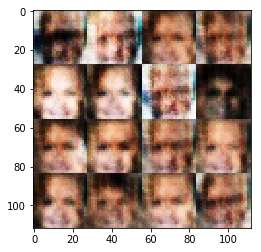

Epoch 1/1... Discriminator Loss: 1.3217... Generator Loss: 0.9634
Epoch 1/1... Discriminator Loss: 1.2652... Generator Loss: 1.1507
Epoch 1/1... Discriminator Loss: 1.2047... Generator Loss: 0.8755
Epoch 1/1... Discriminator Loss: 1.3016... Generator Loss: 0.8317
Epoch 1/1... Discriminator Loss: 1.5172... Generator Loss: 0.5726
Epoch 1/1... Discriminator Loss: 1.3970... Generator Loss: 0.6347
Epoch 1/1... Discriminator Loss: 1.2260... Generator Loss: 0.9525
Epoch 1/1... Discriminator Loss: 1.2441... Generator Loss: 0.7951
Epoch 1/1... Discriminator Loss: 1.3954... Generator Loss: 1.0285
Epoch 1/1... Discriminator Loss: 1.3097... Generator Loss: 0.6692


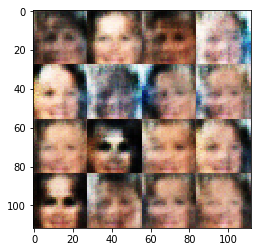

Epoch 1/1... Discriminator Loss: 1.4024... Generator Loss: 0.6620
Epoch 1/1... Discriminator Loss: 1.3307... Generator Loss: 1.0007
Epoch 1/1... Discriminator Loss: 1.2544... Generator Loss: 1.0254
Epoch 1/1... Discriminator Loss: 1.2864... Generator Loss: 0.8115
Epoch 1/1... Discriminator Loss: 1.2266... Generator Loss: 0.9556
Epoch 1/1... Discriminator Loss: 1.2529... Generator Loss: 1.2581
Epoch 1/1... Discriminator Loss: 1.2734... Generator Loss: 1.0693
Epoch 1/1... Discriminator Loss: 1.3132... Generator Loss: 1.0320
Epoch 1/1... Discriminator Loss: 1.3683... Generator Loss: 0.7361
Epoch 1/1... Discriminator Loss: 1.2980... Generator Loss: 1.2649


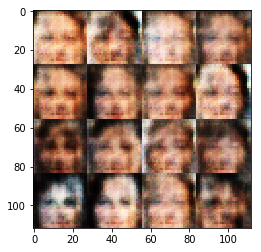

Epoch 1/1... Discriminator Loss: 1.4081... Generator Loss: 1.4935
Epoch 1/1... Discriminator Loss: 1.3589... Generator Loss: 0.7224
Epoch 1/1... Discriminator Loss: 1.2365... Generator Loss: 0.8165
Epoch 1/1... Discriminator Loss: 1.3181... Generator Loss: 1.2649
Epoch 1/1... Discriminator Loss: 1.2985... Generator Loss: 1.1774
Epoch 1/1... Discriminator Loss: 1.4480... Generator Loss: 1.3157
Epoch 1/1... Discriminator Loss: 1.2217... Generator Loss: 0.8796
Epoch 1/1... Discriminator Loss: 1.3249... Generator Loss: 0.8634
Epoch 1/1... Discriminator Loss: 1.3399... Generator Loss: 0.8837
Epoch 1/1... Discriminator Loss: 1.2632... Generator Loss: 1.0247


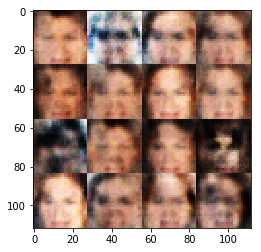

Epoch 1/1... Discriminator Loss: 1.3910... Generator Loss: 0.8442
Epoch 1/1... Discriminator Loss: 1.3765... Generator Loss: 0.6500
Epoch 1/1... Discriminator Loss: 1.2721... Generator Loss: 1.2460
Epoch 1/1... Discriminator Loss: 1.2102... Generator Loss: 1.1218
Epoch 1/1... Discriminator Loss: 1.2494... Generator Loss: 1.1461
Epoch 1/1... Discriminator Loss: 1.3306... Generator Loss: 0.7316
Epoch 1/1... Discriminator Loss: 1.4380... Generator Loss: 0.8789
Epoch 1/1... Discriminator Loss: 1.3861... Generator Loss: 0.6023
Epoch 1/1... Discriminator Loss: 1.2262... Generator Loss: 1.0405
Epoch 1/1... Discriminator Loss: 1.3896... Generator Loss: 0.8406


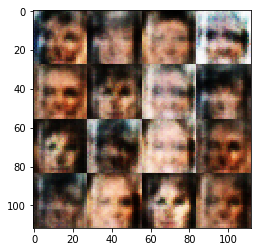

Epoch 1/1... Discriminator Loss: 1.5264... Generator Loss: 0.7667
Epoch 1/1... Discriminator Loss: 1.4749... Generator Loss: 0.9333
Epoch 1/1... Discriminator Loss: 1.3686... Generator Loss: 1.2934
Epoch 1/1... Discriminator Loss: 1.2209... Generator Loss: 0.8944
Epoch 1/1... Discriminator Loss: 1.3664... Generator Loss: 0.8732
Epoch 1/1... Discriminator Loss: 1.3928... Generator Loss: 1.0831
Epoch 1/1... Discriminator Loss: 1.5397... Generator Loss: 1.5898
Epoch 1/1... Discriminator Loss: 1.2923... Generator Loss: 0.8064
Epoch 1/1... Discriminator Loss: 1.3686... Generator Loss: 1.1193
Epoch 1/1... Discriminator Loss: 1.4846... Generator Loss: 0.5306


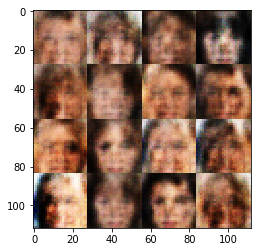

Epoch 1/1... Discriminator Loss: 1.2821... Generator Loss: 1.0474
Epoch 1/1... Discriminator Loss: 1.3645... Generator Loss: 0.8178
Epoch 1/1... Discriminator Loss: 1.3006... Generator Loss: 0.6739
Epoch 1/1... Discriminator Loss: 1.2937... Generator Loss: 0.8660
Epoch 1/1... Discriminator Loss: 1.2379... Generator Loss: 0.8191
Epoch 1/1... Discriminator Loss: 1.3913... Generator Loss: 0.6777
Epoch 1/1... Discriminator Loss: 1.3744... Generator Loss: 1.0069
Epoch 1/1... Discriminator Loss: 1.3324... Generator Loss: 0.7093
Epoch 1/1... Discriminator Loss: 1.4292... Generator Loss: 0.6367
Epoch 1/1... Discriminator Loss: 1.3311... Generator Loss: 0.8287


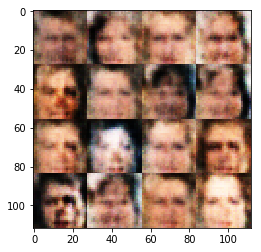

Epoch 1/1... Discriminator Loss: 1.3886... Generator Loss: 1.3667
Epoch 1/1... Discriminator Loss: 1.2691... Generator Loss: 0.7595
Epoch 1/1... Discriminator Loss: 1.2549... Generator Loss: 0.8540
Epoch 1/1... Discriminator Loss: 1.3063... Generator Loss: 0.9359
Epoch 1/1... Discriminator Loss: 1.4016... Generator Loss: 0.9451
Epoch 1/1... Discriminator Loss: 1.4008... Generator Loss: 0.9891
Epoch 1/1... Discriminator Loss: 1.3038... Generator Loss: 0.7305
Epoch 1/1... Discriminator Loss: 1.2079... Generator Loss: 1.1150
Epoch 1/1... Discriminator Loss: 1.1754... Generator Loss: 0.8827
Epoch 1/1... Discriminator Loss: 1.2347... Generator Loss: 0.9856


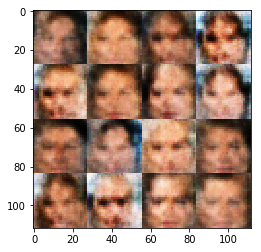

Epoch 1/1... Discriminator Loss: 1.2272... Generator Loss: 0.8688
Epoch 1/1... Discriminator Loss: 1.4344... Generator Loss: 1.1548
Epoch 1/1... Discriminator Loss: 1.2582... Generator Loss: 0.7798
Epoch 1/1... Discriminator Loss: 1.5468... Generator Loss: 0.6303
Epoch 1/1... Discriminator Loss: 1.4268... Generator Loss: 0.7587
Epoch 1/1... Discriminator Loss: 1.2878... Generator Loss: 0.9539
Epoch 1/1... Discriminator Loss: 1.4977... Generator Loss: 0.9273
Epoch 1/1... Discriminator Loss: 1.3199... Generator Loss: 0.7545
Epoch 1/1... Discriminator Loss: 1.3333... Generator Loss: 0.7558
Epoch 1/1... Discriminator Loss: 1.3545... Generator Loss: 0.7227


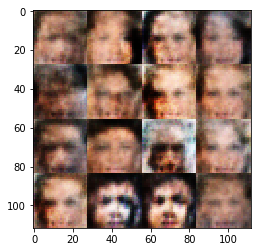

Epoch 1/1... Discriminator Loss: 1.3137... Generator Loss: 0.8114
Epoch 1/1... Discriminator Loss: 1.4443... Generator Loss: 0.6320
Epoch 1/1... Discriminator Loss: 1.1999... Generator Loss: 1.1070
Epoch 1/1... Discriminator Loss: 1.2918... Generator Loss: 1.0889
Epoch 1/1... Discriminator Loss: 1.3338... Generator Loss: 0.9396
Epoch 1/1... Discriminator Loss: 1.2888... Generator Loss: 1.0930
Epoch 1/1... Discriminator Loss: 1.4158... Generator Loss: 0.7089
Epoch 1/1... Discriminator Loss: 1.4039... Generator Loss: 0.6998
Epoch 1/1... Discriminator Loss: 1.3707... Generator Loss: 1.0229
Epoch 1/1... Discriminator Loss: 1.2973... Generator Loss: 0.8372


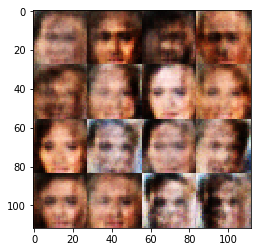

Epoch 1/1... Discriminator Loss: 1.4338... Generator Loss: 0.8061
Epoch 1/1... Discriminator Loss: 1.2086... Generator Loss: 0.9539
Epoch 1/1... Discriminator Loss: 1.3555... Generator Loss: 0.7628
Epoch 1/1... Discriminator Loss: 1.3825... Generator Loss: 0.9350
Epoch 1/1... Discriminator Loss: 1.2132... Generator Loss: 0.9345
Epoch 1/1... Discriminator Loss: 1.4144... Generator Loss: 0.8424
Epoch 1/1... Discriminator Loss: 1.3333... Generator Loss: 0.8503
Epoch 1/1... Discriminator Loss: 1.4277... Generator Loss: 0.6008
Epoch 1/1... Discriminator Loss: 1.3652... Generator Loss: 0.9744
Epoch 1/1... Discriminator Loss: 1.4987... Generator Loss: 0.5754


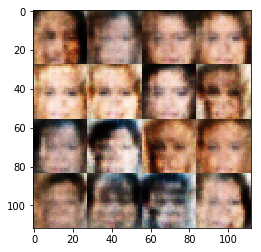

Epoch 1/1... Discriminator Loss: 1.3307... Generator Loss: 0.8227
Epoch 1/1... Discriminator Loss: 1.3430... Generator Loss: 0.7544
Epoch 1/1... Discriminator Loss: 1.3515... Generator Loss: 1.0851
Epoch 1/1... Discriminator Loss: 1.2949... Generator Loss: 1.0681
Epoch 1/1... Discriminator Loss: 1.4240... Generator Loss: 0.7531
Epoch 1/1... Discriminator Loss: 1.4640... Generator Loss: 0.6102
Epoch 1/1... Discriminator Loss: 1.4405... Generator Loss: 0.6791
Epoch 1/1... Discriminator Loss: 1.3418... Generator Loss: 0.8678
Epoch 1/1... Discriminator Loss: 1.3736... Generator Loss: 0.7180
Epoch 1/1... Discriminator Loss: 1.4832... Generator Loss: 0.6306


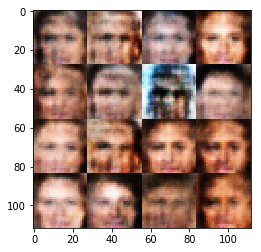

Epoch 1/1... Discriminator Loss: 1.4887... Generator Loss: 0.8045
Epoch 1/1... Discriminator Loss: 1.4750... Generator Loss: 0.7063
Epoch 1/1... Discriminator Loss: 1.4149... Generator Loss: 0.6683
Epoch 1/1... Discriminator Loss: 1.4279... Generator Loss: 0.6668
Epoch 1/1... Discriminator Loss: 1.3803... Generator Loss: 0.8374
Epoch 1/1... Discriminator Loss: 1.4042... Generator Loss: 0.7947
Epoch 1/1... Discriminator Loss: 1.3303... Generator Loss: 0.7668
Epoch 1/1... Discriminator Loss: 1.3106... Generator Loss: 0.8948
Epoch 1/1... Discriminator Loss: 1.3647... Generator Loss: 0.7696
Epoch 1/1... Discriminator Loss: 1.4037... Generator Loss: 0.8441


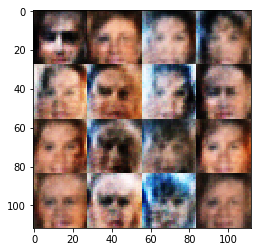

Epoch 1/1... Discriminator Loss: 1.3684... Generator Loss: 0.7429
Epoch 1/1... Discriminator Loss: 1.4414... Generator Loss: 0.8467
Epoch 1/1... Discriminator Loss: 1.4286... Generator Loss: 0.7611
Epoch 1/1... Discriminator Loss: 1.3545... Generator Loss: 0.9090
Epoch 1/1... Discriminator Loss: 1.2920... Generator Loss: 0.9271
Epoch 1/1... Discriminator Loss: 1.3948... Generator Loss: 0.7709
Epoch 1/1... Discriminator Loss: 1.3816... Generator Loss: 0.8241
Epoch 1/1... Discriminator Loss: 1.3064... Generator Loss: 0.8001
Epoch 1/1... Discriminator Loss: 1.3273... Generator Loss: 0.8554
Epoch 1/1... Discriminator Loss: 1.3169... Generator Loss: 0.7875


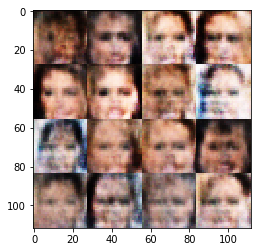

Epoch 1/1... Discriminator Loss: 1.3338... Generator Loss: 0.9124
Epoch 1/1... Discriminator Loss: 1.3926... Generator Loss: 0.8367
Epoch 1/1... Discriminator Loss: 1.4321... Generator Loss: 0.6023
Epoch 1/1... Discriminator Loss: 1.3640... Generator Loss: 0.9770
Epoch 1/1... Discriminator Loss: 1.3843... Generator Loss: 0.8824
Epoch 1/1... Discriminator Loss: 1.2414... Generator Loss: 1.1164
Epoch 1/1... Discriminator Loss: 1.4016... Generator Loss: 0.6607
Epoch 1/1... Discriminator Loss: 1.3740... Generator Loss: 0.8005
Epoch 1/1... Discriminator Loss: 1.4054... Generator Loss: 0.7614
Epoch 1/1... Discriminator Loss: 1.3223... Generator Loss: 0.8994


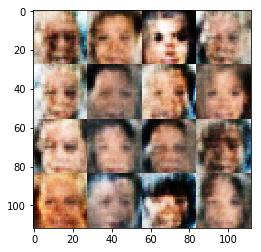

Epoch 1/1... Discriminator Loss: 1.3396... Generator Loss: 0.8794
Epoch 1/1... Discriminator Loss: 1.4142... Generator Loss: 0.9510
Epoch 1/1... Discriminator Loss: 1.3924... Generator Loss: 0.8369
Epoch 1/1... Discriminator Loss: 1.3179... Generator Loss: 0.9469
Epoch 1/1... Discriminator Loss: 1.3151... Generator Loss: 0.8190
Epoch 1/1... Discriminator Loss: 1.2884... Generator Loss: 0.8161
Epoch 1/1... Discriminator Loss: 1.3786... Generator Loss: 0.8633
Epoch 1/1... Discriminator Loss: 1.4683... Generator Loss: 0.7270
Epoch 1/1... Discriminator Loss: 1.3983... Generator Loss: 0.7459
Epoch 1/1... Discriminator Loss: 1.3379... Generator Loss: 0.7581


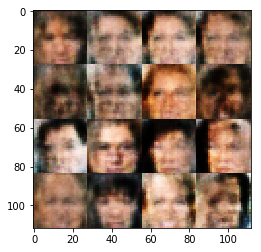

Epoch 1/1... Discriminator Loss: 1.4606... Generator Loss: 0.7456
Epoch 1/1... Discriminator Loss: 1.4696... Generator Loss: 0.8403
Epoch 1/1... Discriminator Loss: 1.3197... Generator Loss: 0.7337
Epoch 1/1... Discriminator Loss: 1.3753... Generator Loss: 0.7722
Epoch 1/1... Discriminator Loss: 1.3055... Generator Loss: 0.8303
Epoch 1/1... Discriminator Loss: 1.3593... Generator Loss: 0.7434
Epoch 1/1... Discriminator Loss: 1.3390... Generator Loss: 0.8532
Epoch 1/1... Discriminator Loss: 1.3400... Generator Loss: 0.7748
Epoch 1/1... Discriminator Loss: 1.3143... Generator Loss: 0.9614
Epoch 1/1... Discriminator Loss: 1.3714... Generator Loss: 0.9300


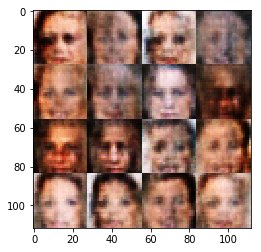

Epoch 1/1... Discriminator Loss: 1.4245... Generator Loss: 0.6209
Epoch 1/1... Discriminator Loss: 1.3730... Generator Loss: 0.7366
Epoch 1/1... Discriminator Loss: 1.3091... Generator Loss: 0.8210
Epoch 1/1... Discriminator Loss: 1.3217... Generator Loss: 0.8675
Epoch 1/1... Discriminator Loss: 1.3931... Generator Loss: 0.7388
Epoch 1/1... Discriminator Loss: 1.3116... Generator Loss: 0.7716
Epoch 1/1... Discriminator Loss: 1.3229... Generator Loss: 0.8325
Epoch 1/1... Discriminator Loss: 1.4135... Generator Loss: 1.0163
Epoch 1/1... Discriminator Loss: 1.3171... Generator Loss: 0.6743
Epoch 1/1... Discriminator Loss: 1.3905... Generator Loss: 0.6911


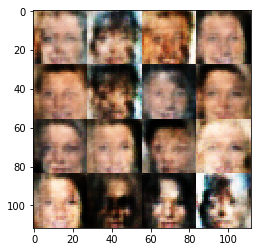

Epoch 1/1... Discriminator Loss: 1.3018... Generator Loss: 0.8460
Epoch 1/1... Discriminator Loss: 1.4215... Generator Loss: 0.7037
Epoch 1/1... Discriminator Loss: 1.4341... Generator Loss: 0.7452
Epoch 1/1... Discriminator Loss: 1.4433... Generator Loss: 0.7250
Epoch 1/1... Discriminator Loss: 1.3552... Generator Loss: 0.8585
Epoch 1/1... Discriminator Loss: 1.3592... Generator Loss: 0.8862
Epoch 1/1... Discriminator Loss: 1.3766... Generator Loss: 0.7876
Epoch 1/1... Discriminator Loss: 1.3046... Generator Loss: 0.9374
Epoch 1/1... Discriminator Loss: 1.3730... Generator Loss: 0.7361
Epoch 1/1... Discriminator Loss: 1.2896... Generator Loss: 0.8588


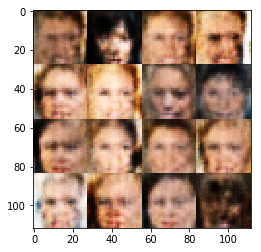

Epoch 1/1... Discriminator Loss: 1.4066... Generator Loss: 0.8974
Epoch 1/1... Discriminator Loss: 1.3687... Generator Loss: 0.7445
Epoch 1/1... Discriminator Loss: 1.2974... Generator Loss: 0.9611
Epoch 1/1... Discriminator Loss: 1.4035... Generator Loss: 0.7190
Epoch 1/1... Discriminator Loss: 1.2879... Generator Loss: 0.8615
Epoch 1/1... Discriminator Loss: 1.3508... Generator Loss: 0.8948
Epoch 1/1... Discriminator Loss: 1.3511... Generator Loss: 0.7576
Epoch 1/1... Discriminator Loss: 1.3891... Generator Loss: 0.6840
Epoch 1/1... Discriminator Loss: 1.3813... Generator Loss: 0.8679
Epoch 1/1... Discriminator Loss: 1.4067... Generator Loss: 0.8491


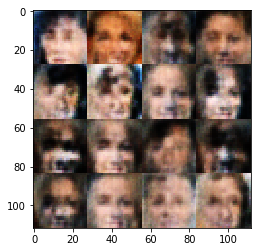

Epoch 1/1... Discriminator Loss: 1.3438... Generator Loss: 0.9130
Epoch 1/1... Discriminator Loss: 1.3928... Generator Loss: 0.8688
Epoch 1/1... Discriminator Loss: 1.3677... Generator Loss: 0.7562
Epoch 1/1... Discriminator Loss: 1.4392... Generator Loss: 0.7106
Epoch 1/1... Discriminator Loss: 1.3785... Generator Loss: 0.8046
Epoch 1/1... Discriminator Loss: 1.3836... Generator Loss: 0.7500
Epoch 1/1... Discriminator Loss: 1.2805... Generator Loss: 0.9741
Epoch 1/1... Discriminator Loss: 1.2815... Generator Loss: 0.9191
Epoch 1/1... Discriminator Loss: 1.2904... Generator Loss: 1.2318
Epoch 1/1... Discriminator Loss: 1.3089... Generator Loss: 0.8423


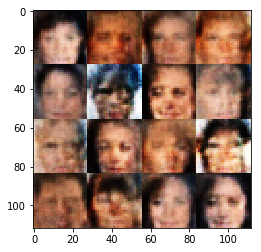

Epoch 1/1... Discriminator Loss: 1.4670... Generator Loss: 0.6559
Epoch 1/1... Discriminator Loss: 1.3071... Generator Loss: 0.8174
Epoch 1/1... Discriminator Loss: 1.3176... Generator Loss: 0.9453
Epoch 1/1... Discriminator Loss: 1.3134... Generator Loss: 0.9122
Epoch 1/1... Discriminator Loss: 1.3877... Generator Loss: 0.9680
Epoch 1/1... Discriminator Loss: 1.3419... Generator Loss: 0.8992
Epoch 1/1... Discriminator Loss: 1.3781... Generator Loss: 0.8452
Epoch 1/1... Discriminator Loss: 1.2624... Generator Loss: 0.8883
Epoch 1/1... Discriminator Loss: 1.2970... Generator Loss: 1.0076
Epoch 1/1... Discriminator Loss: 1.2937... Generator Loss: 1.0895


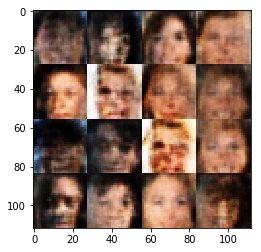

Epoch 1/1... Discriminator Loss: 1.3942... Generator Loss: 0.7037
Epoch 1/1... Discriminator Loss: 1.3388... Generator Loss: 0.8705
Epoch 1/1... Discriminator Loss: 1.2653... Generator Loss: 0.8414
Epoch 1/1... Discriminator Loss: 1.4172... Generator Loss: 0.6788
Epoch 1/1... Discriminator Loss: 1.3339... Generator Loss: 0.8399
Epoch 1/1... Discriminator Loss: 1.3479... Generator Loss: 0.8306
Epoch 1/1... Discriminator Loss: 1.3760... Generator Loss: 0.8325
Epoch 1/1... Discriminator Loss: 1.2901... Generator Loss: 0.8911
Epoch 1/1... Discriminator Loss: 1.2768... Generator Loss: 0.9072
Epoch 1/1... Discriminator Loss: 1.3898... Generator Loss: 0.6929


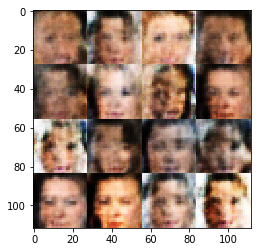

Epoch 1/1... Discriminator Loss: 1.4747... Generator Loss: 0.7738
Epoch 1/1... Discriminator Loss: 1.2942... Generator Loss: 0.9242
Epoch 1/1... Discriminator Loss: 1.2954... Generator Loss: 0.9358
Epoch 1/1... Discriminator Loss: 1.3904... Generator Loss: 0.8978
Epoch 1/1... Discriminator Loss: 1.3353... Generator Loss: 0.8455
Epoch 1/1... Discriminator Loss: 1.3016... Generator Loss: 0.9314
Epoch 1/1... Discriminator Loss: 1.3380... Generator Loss: 0.9034
Epoch 1/1... Discriminator Loss: 1.3698... Generator Loss: 0.8435
Epoch 1/1... Discriminator Loss: 1.3597... Generator Loss: 0.9034
Epoch 1/1... Discriminator Loss: 1.3909... Generator Loss: 0.9173


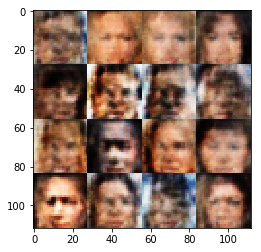

Epoch 1/1... Discriminator Loss: 1.3894... Generator Loss: 0.8651
Epoch 1/1... Discriminator Loss: 1.3030... Generator Loss: 0.7714
Epoch 1/1... Discriminator Loss: 1.3072... Generator Loss: 0.6913
Epoch 1/1... Discriminator Loss: 1.2863... Generator Loss: 0.9536
Epoch 1/1... Discriminator Loss: 1.3193... Generator Loss: 0.8359
Epoch 1/1... Discriminator Loss: 1.2789... Generator Loss: 0.8582
Epoch 1/1... Discriminator Loss: 1.3441... Generator Loss: 0.9245
Epoch 1/1... Discriminator Loss: 1.3153... Generator Loss: 0.7963
Epoch 1/1... Discriminator Loss: 1.3678... Generator Loss: 0.8181
Epoch 1/1... Discriminator Loss: 1.2601... Generator Loss: 0.8427


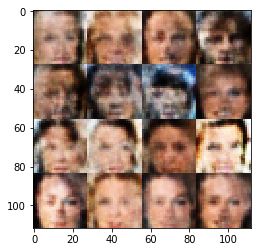

Epoch 1/1... Discriminator Loss: 1.3228... Generator Loss: 0.8215
Epoch 1/1... Discriminator Loss: 1.3215... Generator Loss: 0.8086
Epoch 1/1... Discriminator Loss: 1.3323... Generator Loss: 0.9095
Epoch 1/1... Discriminator Loss: 1.2842... Generator Loss: 0.7797
Epoch 1/1... Discriminator Loss: 1.3061... Generator Loss: 1.0064
Epoch 1/1... Discriminator Loss: 1.2750... Generator Loss: 0.8532
Epoch 1/1... Discriminator Loss: 1.4004... Generator Loss: 0.6302
Epoch 1/1... Discriminator Loss: 1.3048... Generator Loss: 0.8438
Epoch 1/1... Discriminator Loss: 1.1955... Generator Loss: 1.0700
Epoch 1/1... Discriminator Loss: 1.3484... Generator Loss: 0.7376


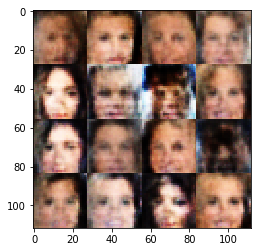

Epoch 1/1... Discriminator Loss: 1.3160... Generator Loss: 0.6785
Epoch 1/1... Discriminator Loss: 1.4715... Generator Loss: 0.7032
Epoch 1/1... Discriminator Loss: 1.4369... Generator Loss: 0.7985
Epoch 1/1... Discriminator Loss: 1.3077... Generator Loss: 0.7500
Epoch 1/1... Discriminator Loss: 1.4087... Generator Loss: 0.7442
Epoch 1/1... Discriminator Loss: 1.2185... Generator Loss: 0.7896
Epoch 1/1... Discriminator Loss: 1.3108... Generator Loss: 0.9433
Epoch 1/1... Discriminator Loss: 1.2531... Generator Loss: 0.8874
Epoch 1/1... Discriminator Loss: 1.2383... Generator Loss: 0.9166
Epoch 1/1... Discriminator Loss: 1.4505... Generator Loss: 0.6347


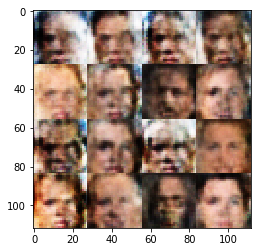

Epoch 1/1... Discriminator Loss: 1.3835... Generator Loss: 0.7521
Epoch 1/1... Discriminator Loss: 1.3812... Generator Loss: 0.8253
Epoch 1/1... Discriminator Loss: 1.3197... Generator Loss: 0.7716
Epoch 1/1... Discriminator Loss: 1.3373... Generator Loss: 0.8309
Epoch 1/1... Discriminator Loss: 1.3890... Generator Loss: 0.8649
Epoch 1/1... Discriminator Loss: 1.3103... Generator Loss: 0.9629
Epoch 1/1... Discriminator Loss: 1.2868... Generator Loss: 0.8468
Epoch 1/1... Discriminator Loss: 1.3366... Generator Loss: 0.7303
Epoch 1/1... Discriminator Loss: 1.4222... Generator Loss: 0.6411
Epoch 1/1... Discriminator Loss: 1.2833... Generator Loss: 0.8911


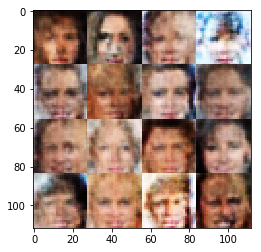

Epoch 1/1... Discriminator Loss: 1.2088... Generator Loss: 1.1230
Epoch 1/1... Discriminator Loss: 1.4501... Generator Loss: 0.6155
Epoch 1/1... Discriminator Loss: 1.4018... Generator Loss: 0.6671
Epoch 1/1... Discriminator Loss: 1.2785... Generator Loss: 0.9773
Epoch 1/1... Discriminator Loss: 1.3431... Generator Loss: 0.8042
Epoch 1/1... Discriminator Loss: 1.4121... Generator Loss: 0.6317
Epoch 1/1... Discriminator Loss: 1.3059... Generator Loss: 1.0447
Epoch 1/1... Discriminator Loss: 1.2489... Generator Loss: 0.8414
Epoch 1/1... Discriminator Loss: 1.3296... Generator Loss: 1.0040
Epoch 1/1... Discriminator Loss: 1.3968... Generator Loss: 0.7333


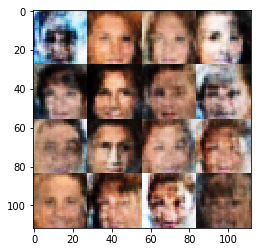

Epoch 1/1... Discriminator Loss: 1.3256... Generator Loss: 1.0719
Epoch 1/1... Discriminator Loss: 1.3261... Generator Loss: 0.8540
Epoch 1/1... Discriminator Loss: 1.3874... Generator Loss: 0.6986
Epoch 1/1... Discriminator Loss: 1.3969... Generator Loss: 0.7047
Epoch 1/1... Discriminator Loss: 1.3924... Generator Loss: 0.8457
Epoch 1/1... Discriminator Loss: 1.2933... Generator Loss: 0.9134
Epoch 1/1... Discriminator Loss: 1.3165... Generator Loss: 1.1064
Epoch 1/1... Discriminator Loss: 1.3796... Generator Loss: 0.7510
Epoch 1/1... Discriminator Loss: 1.3369... Generator Loss: 0.9030
Epoch 1/1... Discriminator Loss: 1.3551... Generator Loss: 1.0617


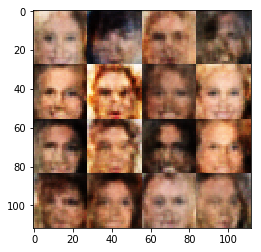

Epoch 1/1... Discriminator Loss: 1.3756... Generator Loss: 0.8529
Epoch 1/1... Discriminator Loss: 1.4525... Generator Loss: 0.8598


In [ ]:
batch_size = 32
z_dim = 100
learning_rate = 0.0001
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.